In [1]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.style.use('ggplot')
pd.set_option('display.max_rows', None)
import seaborn as sns

<Figure size 800x640 with 0 Axes>

In [58]:
t1_user_active_min     = pd.read_csv("C:/Users/niraj/OneDrive - Texas A&M University/Desktop/quora_data_challenge/t1_user_active_min.csv")
t2_user_variant        = pd.read_csv("C:/Users/niraj/OneDrive - Texas A&M University/Desktop/quora_data_challenge/t2_user_variant.csv")
t3_user_active_min_pre = pd.read_csv("C:/Users/niraj/OneDrive - Texas A&M University/Desktop/quora_data_challenge/t3_user_active_min_pre.csv")
t4_user_attributes     = pd.read_csv("C:/Users/niraj/OneDrive - Texas A&M University/Desktop/quora_data_challenge/t4_user_attributes.csv")

In [59]:
t1_user_active_min = t1_user_active_min[t1_user_active_min.active_mins != 99999]

In [60]:
t1_user_active_min.describe()

,uid,active_mins
count,1.066230e+06,1.066230e+06
mean,2.422073e+04,2.004248e+01
std,1.417370e+04,4.653763e+01
min,0.000000e+00,1.000000e+00
25%,1.202000e+04,2.000000e+00
50%,2.394100e+04,5.000000e+00
75%,3.618100e+04,1.700000e+01
max,4.999900e+04,8.970000e+02


In [61]:
t3_user_active_min_pre = t3_user_active_min_pre[t3_user_active_min_pre.active_mins != 99999]

In [66]:
t3_user_active_min_pre.describe()

,uid,active_mins
count,1.189927e+06,1.189927e+06
mean,2.420603e+04,1.825735e+01
std,1.418028e+04,4.354546e+01
min,0.000000e+00,1.000000e+00
25%,1.197500e+04,2.000000e+00
50%,2.393300e+04,4.000000e+00
75%,3.619600e+04,1.400000e+01
max,4.999900e+04,8.970000e+02


In [67]:
t2_t4 = pd.merge(t2_user_variant,t4_user_attributes,how = "inner", on = "uid")

In [68]:
t2_t4.head()

,uid,variant_number,dt,signup_date,gender,user_type
0,0,0,2019-02-06,2018-09-24,male,non_reader
1,1,0,2019-02-06,2016-11-07,male,reader
2,2,0,2019-02-06,2018-09-17,male,non_reader
3,3,0,2019-02-06,2018-03-04,male,non_reader
4,4,0,2019-02-06,2017-03-09,male,non_reader


In [69]:
post_AB_full = pd.merge(t1_user_active_min,t2_t4,how = "inner", on = "uid")

In [70]:
post_AB_full.head()

,uid,dt_x,active_mins,variant_number,dt_y,signup_date,gender,user_type
0,0,2019-02-22,5.0,0,2019-02-06,2018-09-24,male,non_reader
1,0,2019-03-11,5.0,0,2019-02-06,2018-09-24,male,non_reader
2,0,2019-03-18,3.0,0,2019-02-06,2018-09-24,male,non_reader
3,0,2019-03-22,4.0,0,2019-02-06,2018-09-24,male,non_reader
4,0,2019-04-03,9.0,0,2019-02-06,2018-09-24,male,non_reader


In [71]:
pre_AB_full = pd.merge(t3_user_active_min_pre,t2_t4,how = "inner", on = "uid")

In [72]:
post_AB_full.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1066220, 1066221, 1066222, 1066223, 1066224, 1066225, 1066226,
            1066227, 1066228, 1066229],
           dtype='int64', length=1066230)

In [73]:
pd.DataFrame(pre_AB_full['active_mins'].describe())

,active_mins
count,1.189927e+06
mean,1.825735e+01
std,4.354546e+01
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,1.400000e+01
max,8.970000e+02


In [74]:
pd.DataFrame(t3_user_active_min_pre['active_mins'].describe())

,active_mins
count,1.189927e+06
mean,1.825735e+01
std,4.354546e+01
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,1.400000e+01
max,8.970000e+02


In [75]:
pre_AB_var_0 = pre_AB_full[pre_AB_full['variant_number']==0]

In [76]:
pre_AB_var_0.describe()

,uid,active_mins,variant_number
count,989328.000000,989328.000000,989328.0
mean,19987.223880,19.204351,0.0
std,11600.375161,45.459884,0.0
min,0.000000,1.000000,0.0
25%,9931.000000,2.000000,0.0
50%,19930.000000,5.000000,0.0
75%,30106.000000,15.000000,0.0
max,39999.000000,897.000000,0.0


In [77]:
pre_AB_var_1 = pre_AB_full[pre_AB_full['variant_number']==1]

In [78]:
post_AB_var_0 = post_AB_full[post_AB_full['variant_number']==0]

In [79]:
post_AB_var_1 = post_AB_full[post_AB_full['variant_number']==1]

In [80]:
list(set(pre_AB_var_0['uid']) & set(pre_AB_var_1['uid']))

[]

In [81]:
def build_dist(df,df1,col,col1,xlabelvalue,label1,label2):
    sns.distplot(df[col], hist=False, label = label1, axlabel = xlabelvalue)
    sns.distplot(df1[col1], hist=False, label = label2, axlabel = xlabelvalue)
    plt.show()

In [159]:
pre_AB_var_0_noout = pre_AB_var_0[pre_AB_var_0.active_mins < np.percentile(pre_AB_var_0.active_mins,90)]

In [160]:
pre_AB_var_0_noout.describe()

,uid,active_mins,variant_number
count,889656.000000,889656.000000,889656.0
mean,19996.564233,8.112711,0.0
std,11613.501896,9.802166,0.0
min,0.000000,1.000000,0.0
25%,9930.000000,2.000000,0.0
50%,19929.000000,4.000000,0.0
75%,30142.000000,10.000000,0.0
max,39999.000000,47.000000,0.0


In [161]:
pre_AB_var_1_noout = pre_AB_var_1[pre_AB_var_1.active_mins < np.percentile(pre_AB_var_1.active_mins,90)]

In [162]:
post_AB_var_0_noout = post_AB_var_0[post_AB_var_0.active_mins < np.percentile(post_AB_var_0.active_mins,90)]

In [163]:
post_AB_var_1_noout = post_AB_var_1[post_AB_var_1.active_mins < np.percentile(post_AB_var_1.active_mins,90)]

C:\Users\niraj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\niraj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


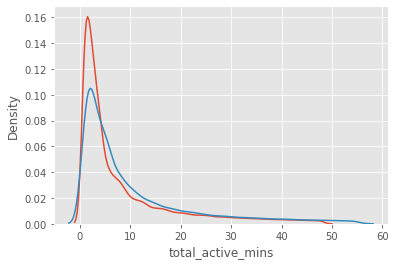

In [173]:
build_dist(post_AB_var_0_noout, post_AB_var_1_noout, 'active_mins', 'active_mins', 'total_active_mins', 'pre_AB_var_0', 'pre_AB_var_1')

C:\Users\niraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


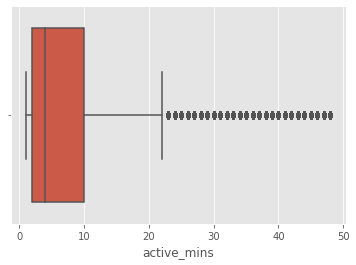

In [208]:
sns.boxplot(post_AB_var_0_noout['active_mins'])

In [151]:
post_AB_var_0_gb = post_AB_var_0_noout.groupby('uid').mean()

In [226]:
pre_AB_var_1_gb.describe()

,active_mins,variant_number
count,9915.000000,9915.0
mean,5.053109,1.0
std,3.836209,0.0
min,1.000000,1.0
25%,2.600000,1.0
50%,3.800000,1.0
75%,6.089899,1.0
max,36.000000,1.0


In [153]:
post_AB_var_1_gb = post_AB_var_1_noout.groupby('uid').mean()

In [227]:
post_AB_var_1_gb.describe()

,active_mins,variant_number
count,9148.000000,9148.0
mean,4.628010,1.0
std,1.772328,0.0
min,1.000000,1.0
25%,3.404688,1.0
50%,4.500000,1.0
75%,5.675605,1.0
max,14.000000,1.0


In [241]:
post_AB_var_1_female = post_AB_var_1_noout[post_AB_var_1_noout['gender']=='female'].groupby('uid').mean()

In [239]:
post_AB_var_1_male = post_AB_var_1_noout[post_AB_var_1_noout['gender']=='male'].groupby('uid').mean()

In [256]:
pre_AB_var_1_male = pre_AB_var_1_noout[pre_AB_var_1_noout['gender']=='male'].groupby('uid').mean()

In [258]:
pre_AB_var_1_female = pre_AB_var_1_noout[pre_AB_var_1_noout['gender']=='female'].groupby('uid').mean()

In [247]:
post_AB_var_1_new_user.describe()

,active_mins,variant_number
count,808.000000,808.0
mean,5.671429,1.0
std,4.875084,0.0
min,1.000000,1.0
25%,3.000000,1.0
50%,4.333333,1.0
75%,7.000000,1.0
max,40.000000,1.0


In [243]:
post_AB_var_1_reader = post_AB_var_1_noout[post_AB_var_1_noout['user_type']=='reader'].groupby('uid').mean()

In [244]:
post_AB_var_1_non_reader = post_AB_var_1_noout[post_AB_var_1_noout['user_type']=='non_reader'].groupby('uid').mean()

In [245]:
post_AB_var_1_new_user = post_AB_var_1_noout[post_AB_var_1_noout['user_type']=='new_user'].groupby('uid').mean()

In [246]:
post_AB_var_1_contributor = post_AB_var_1_noout[post_AB_var_1_noout['user_type']=='contributor'].groupby('uid').mean()

In [259]:
import scipy.stats as stats

#perform two sample t-test with erequal variances
stats.ttest_ind(a=np.array(pre_AB_var_1_female['active_mins']),
                b=np.array(post_AB_var_1_female['active_mins']), equal_var=True,alternative='less')

Ttest_indResult(statistic=-22.408306917048744, pvalue=9.398604043153432e-107)